Alunos: Josemar, Marcio, X

In [480]:
import pandas as pd
df = pd.read_csv("marielle -filter-retweets.csv")
print(df.count())
#Contando os sentimentos classificados como negativco
print('negativo',df[df.Sentimento==2].count())

#Contando os sentimentos classificados como neutro
print('neutro',df[df.Sentimento==0].count())

#Contando os sentimentos classificados como positivo
print('positivo',df[df.Sentimento==1].count())
print(type(df))

Unnamed: 0    1000
Texto         1000
Sentimento    1000
dtype: int64
negativo Unnamed: 0    108
Texto         108
Sentimento    108
dtype: int64
neutro Unnamed: 0    799
Texto         799
Sentimento    799
dtype: int64
positivo Unnamed: 0    93
Texto         93
Sentimento    93
dtype: int64
<class 'pandas.core.frame.DataFrame'>


In [242]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.model_selection import cross_val_predict,train_test_split
import nltk
from sklearn import svm # "Support Vector Classifier"
from sklearn.pipeline import Pipeline



In [465]:
# Agora, vamos treinar o modelo usando a abordagem Bag of Words e o algoritmo Arvore de Decisão
#    - Bag of Words, na prática, cria um vetor com cada uma das palavras do texto completo da base,
#      depois, calcula a frequência em que essas palavras ocorrem em uma data sentença, para então
#      classificar/treinar o modelo
#    - Exemplo HIPOTÉTICO de três sentenças vetorizadas "por palavra" e classificadas baseada na
#      frequência de suas palavras:
#         {0,n_classes,2,0,0,1,0,0,0,1, Positivo}
#         {0,0,1,0,0,1,0,1,0,0, Negativo}
#         {0,1,1,0,0,1,0,0,0,0, Neutro}
#    - Olhando para esses vetores, meu palpite é que as palavras nas posições 2 e n_classes são as com maior
#      peso na determinação de a que classe pertence cada uma das três sentenças avaliadas
#    - A função fit_transform faz exatamente esse processo: ajusta o modelo, aprende o vocabulário,
#      e transforma os dados de treinamento em feature vectors, a.k.a. vetor com frequêcia das palavras
#Contando classes
from sklearn.preprocessing import label_binarize
df = df.dropna()
X_tweets = df.Texto
 
y_classes = df.Sentimento

stopwords = nltk.corpus.stopwords.words('portuguese')

#y_classes = label_binarize(y_classes, classes=[0,1,2])

random_state = np.random.RandomState(0)

#n_samples, n_features = [1000,3]
#X_tweets = np.c_[X_tweets, random_state.randn(n_samples, 2 * n_features)]

#vectorizer = CountVectorizer(analyzer = "word", stop_words=stopwords)
train_size = 0.8
test_size = 0.2

vectorizer = CountVectorizer(
        analyzer="word",
        tokenizer=None,
        preprocessor=None,
        stop_words=stopwords)

X_train, X_test, Y_train, Y_test = train_test_split(X_tweets, y_classes, train_size=train_size,random_state=0)

print(len(Y_train),'Y train')
print(len(Y_test),'Y test')
print(len(X_train),'X train')
print(len(X_test),'X test')

800 Y train
200 Y test
800 X train
200 X test


In [290]:
from sklearn.multiclass import OneVsRestClassifier
def treino(modelo):
    pipe = None
    pipe = Pipeline([('vect', vectorizer), ('svc', modelo)])
   
    pipe.fit(X_train, Y_train)
    return pipe


def predicao(pipeNew):    
    Y_pred = None
    Y_pred = pipeNew.predict(X_test)
    try:
            #Y_pred = zip(pipe.classes_, pipe.predict_proba([xt])[0])
            #Y_pred.sort(key=lambda tup: tup[1], reverse=True)
            #for cat, prob in Y_pred:
            f1_score = metrics.f1_score(Y_test, Y_pred, average='macro') 
            precisao   = metrics.precision_score(Y_test, Y_pred, average='macro')
            recall = metrics.recall_score(Y_test, Y_pred, average='macro')
            classes = [0,1,2]
            matrix = metrics.confusion_matrix(Y_test,Y_pred,classes)
            acc = metrics.accuracy_score(Y_test,Y_pred)
            print("f1_score com  {:.1%} . ".format(f1_score))
            print("precisao com  {:.1%} . ".format(precisao))
            print("recall com  {:.1%} . ".format(recall))
            
            msg1 = "Acuracia com {:.0%} de treino é: {:.1%}\n".format(train_size, acc)
            print(msg1)
            print(classes)
            print("matrix confusao  \n")
            print(matrix)
    except Exception as e:
            print(e)
    return Y_pred

In [486]:


def treinoPredicao(modelo):
    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(modelo)
    pipe = Pipeline([('vect', vectorizer), ('svc', modelo)])
    return predicaoNew(pipe)

def predicaoNew(classifier):    
    Y_pred = None
    #print(X_train)
    Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
    #Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)
    
   
    try:    
            #prob = classifier.predict_proba([X_train])
            
            #Y_pred = zip(classifier.classes_, prob[0])
            #Y_pred.sort(key=lambda tup: tup[1], reverse=True)
            #for cat, prob in Y_pred:
            #   print(cat)
            f1_score = metrics.f1_score(Y_test, Y_pred, average='macro') 
            precisao   = metrics.precision_score(Y_test, Y_pred, average='macro')
            recall = metrics.recall_score(Y_test, Y_pred, average='macro')
            classes = [0,1,2]
            matrix = metrics.confusion_matrix(Y_test,Y_pred,classes)
            acc = metrics.accuracy_score(Y_test,Y_pred)
            print("f1_score com  {:.1%} . ".format(f1_score))
            print("precisao com  {:.1%} . ".format(precisao))
            print("recall com  {:.1%} . ".format(recall))
            
            msg1 = "Acuracia com {:.0%} de treino é: {:.1%}\n".format(train_size, acc)
            print(msg1)
            print(classes)
            print("matrix confusao  \n")
            print(matrix)
    except Exception as e:
            print(e)
    return Y_pred

In [487]:
#tweets_trans = tweets.apply(labels.fit_transform)
#X_teste_vectorize = vectorizer.fit_transform(X_teste)
#X_vectorize = vectorizer.fit_transform(X)
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
modeloL1 = svm.SVC(kernel='linear', probability=True,random_state=random_state)

modeloRBF = svm.SVC(kernel='rbf', gamma=0.7, C=C)

print('Modelo SVM Kernel Linear')
Y_pred1 = treinoPredicao(modeloL1)




print('\n--------------------------------')
print('Modelo SVM Kernel RBF')
Y_pred2 = treinoPredicao(modeloRBF)

Modelo SVM Kernel Linear
f1_score com  53.3% . 
precisao com  67.1% . 
recall com  48.5% . 
Acuracia com 80% de treino é: 85.0%

[0, 1, 2]
matrix confusao  

[[162   3   2]
 [ 12   4   1]
 [ 12   0   4]]

--------------------------------
Modelo SVM Kernel RBF
f1_score com  44.6% . 
precisao com  95.1% . 
recall com  41.3% . 
Acuracia com 80% de treino é: 85.5%

[0, 1, 2]
matrix confusao  

[[167   0   0]
 [ 14   3   0]
 [ 15   0   1]]


In [496]:
def plotROC(y_pred,titulo):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    classes = [0, 1, 2]
    n_classes = 3
    for i in range(n_classes):
        #print(roc_curve(Y_test[:,], Y_pred1[:,],pos_label=1))
        fpr[i], tpr[i], _tr = roc_curve(Y_test[:,], y_pred[:,],pos_label=1)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area

    fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_pred.ravel(),pos_label=1)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    plt.figure()
    lw = 2
    plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(titulo)
    plt.legend(loc="lower right")
    plt.show()

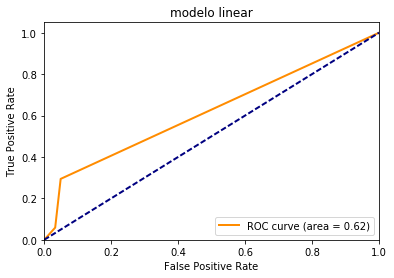

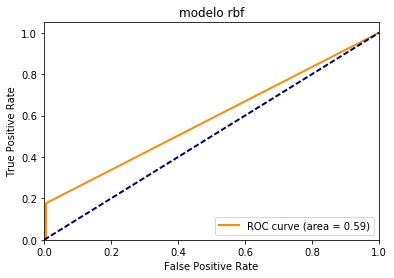

In [498]:
titulo ='modelo linear'
plotROC(Y_pred1,titulo)
titulo ='modelo rbf'
plotROC(Y_pred2,titulo)

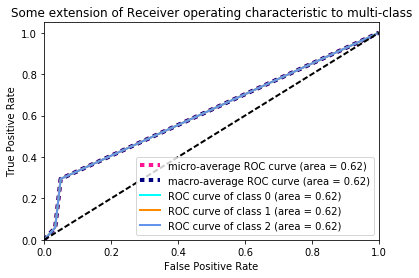

In [479]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes )]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()